In [1]:
from keras.applications import vgg16, mobilenet, resnet50
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
vgg = vgg16.VGG16(weights='imagenet')
mob = mobilenet.MobileNet(weights='imagenet')
res = resnet50.ResNet50(weights='imagenet')

In [24]:
def getHistogram(model):
    weights = model.get_weights()
    w2 = np.absolute(np.concatenate([w.flatten() for w in weights]))
    print w2.shape, min(w2), max(w2)
    plt.loglog(w2, bins = np.logspace(-10, 4, 200))
    plt.gca().set_xscale("log")
    plt.show()

In [ ]:
getHistogram(vgg)

In [21]:
np.logspace(-5, 10, 20)

array([  1.00000000e-05,   6.15848211e-05,   3.79269019e-04,
         2.33572147e-03,   1.43844989e-02,   8.85866790e-02,
         5.45559478e-01,   3.35981829e+00,   2.06913808e+01,
         1.27427499e+02,   7.84759970e+02,   4.83293024e+03,
         2.97635144e+04,   1.83298071e+05,   1.12883789e+06,
         6.95192796e+06,   4.28133240e+07,   2.63665090e+08,
         1.62377674e+09,   1.00000000e+10])

(4253864,) 3.91716e-35 418.236


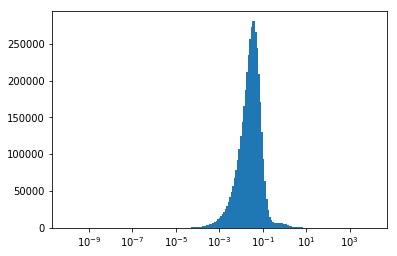

In [22]:
getHistogram(mob)

(25636712,) 0.0 83614.7


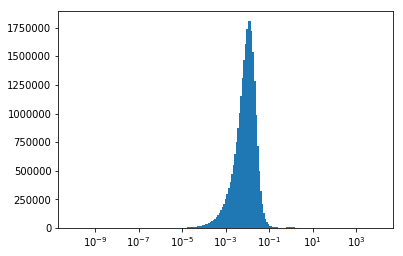

In [23]:
getHistogram(res)